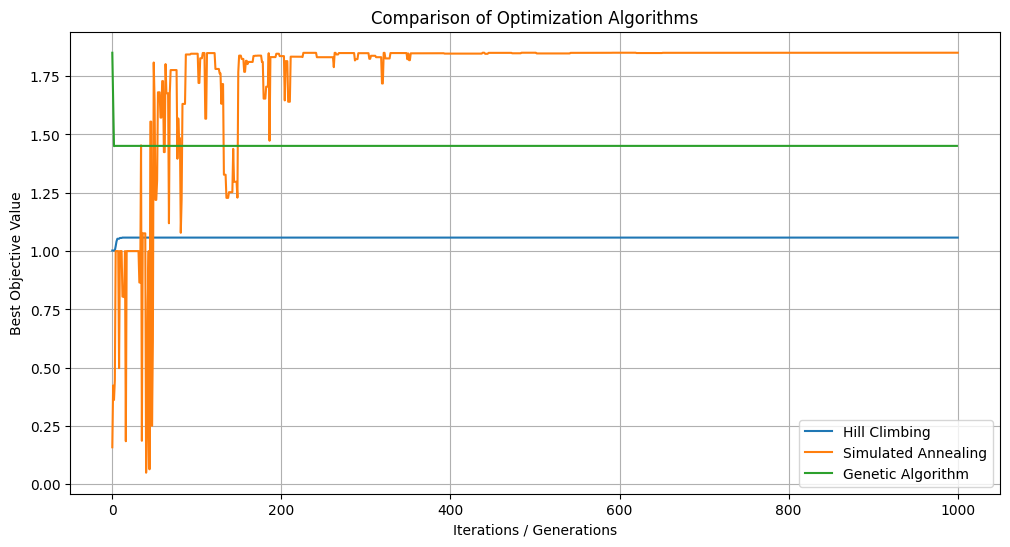


 Final Results:
Hill Climbing:       x = 0.0645, f(x) = 1.0579
Simulated Annealing: x = 0.8512, f(x) = 1.8506
Genetic Algorithm:   x = 0.4522, f(x) = 1.4511


In [1]:
import math
import random
import matplotlib.pyplot as plt

# Objective function
def objective(x):
    return x * math.sin(10 * math.pi * x) + 1.0

# Hill Climbing
def hill_climbing(iterations=1000, step_size=0.01):
    current = random.uniform(0, 1)
    current_score = objective(current)
    history = [(0, current_score)]

    for i in range(1, iterations+1):
        candidate = current + random.uniform(-step_size, step_size)
        candidate = min(max(candidate, 0), 1)
        candidate_score = objective(candidate)
        if candidate_score > current_score:
            current, current_score = candidate, candidate_score
        history.append((i, current_score))
    return current, current_score, history

# Simulated Annealing
def simulated_annealing(iterations=1000, start_temp=1.0, alpha=0.99):
    current = random.uniform(0, 1)
    current_score = objective(current)
    temp = start_temp
    history = [(0, current_score)]

    for i in range(1, iterations+1):
        candidate = current + random.uniform(-0.1, 0.1)
        candidate = min(max(candidate, 0), 1)
        candidate_score = objective(candidate)
        if candidate_score > current_score or math.exp((candidate_score - current_score) / temp) > random.random():
            current, current_score = candidate, candidate_score
        temp *= alpha
        history.append((i, current_score))
    return current, current_score, history

# Genetic Algorithm
def genetic_algorithm(pop_size=20, generations=1000, mutation_rate=0.01):
    def crossover(p1, p2):
        return (p1 + p2) / 2.0

    def mutate(x):
        if random.random() < mutation_rate:
            x += random.uniform(-0.1, 0.1)
        return min(max(x, 0), 1)

    population = [random.uniform(0, 1) for _ in range(pop_size)]
    history = []
    for gen in range(generations):
        scores = [(x, objective(x)) for x in population]
        scores.sort(key=lambda x: x[1], reverse=True)
        history.append((gen, scores[0][1]))
        selected = [x for x, _ in scores[:pop_size // 2]]
        children = []
        while len(children) < pop_size:
            p1, p2 = random.sample(selected, 2)
            child = mutate(crossover(p1, p2))
            children.append(child)
        population = children
    best = max(population, key=objective)
    return best, objective(best), history

# Run all algorithms
hc_solution, hc_score, hc_history = hill_climbing()
sa_solution, sa_score, sa_history = simulated_annealing()
ga_solution, ga_score, ga_history = genetic_algorithm()

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot([x for x, y in hc_history], [y for x, y in hc_history], label="Hill Climbing")
plt.plot([x for x, y in sa_history], [y for x, y in sa_history], label="Simulated Annealing")
plt.plot([x for x, y in ga_history], [y for x, y in ga_history], label="Genetic Algorithm")
plt.xlabel("Iterations / Generations")
plt.ylabel("Best Objective Value")
plt.title("Comparison of Optimization Algorithms")
plt.legend()
plt.grid(True)
plt.show()

# Print final results
print("\n Final Results:")
print(f"Hill Climbing:       x = {hc_solution:.4f}, f(x) = {hc_score:.4f}")
print(f"Simulated Annealing: x = {sa_solution:.4f}, f(x) = {sa_score:.4f}")
print(f"Genetic Algorithm:   x = {ga_solution:.4f}, f(x) = {ga_score:.4f}")
